# Social media advertising

The goal of a business is to understand the needs of its customers and respond to them through products. Knowledge of customer needs allows the company to guide its strategy and development process. By observing certain characteristics of their customers such as age, gender and salary, companies study how customers interact with the products they offer. This technique is used more and more, it allows us to respond to the needs and desires of customers in order to retain them.

The study of consumer behavior on social networks in relation to the purchase of products online is becoming increasingly important. One of the main advantages of this type of advertising is that the company can exploit the demographic, behavioural and geographical information of users and target their advertising appropriately.

### ***Objet de l'étude***

In this project, I study the dependence on the purchase of a product according to the sex, age and estimated salary of a person. Consequently, the study of the advertising strategy allows the company to know with which group of consumers it should make more advertising. 

### ***Dataset***

The data contains 5 columns:

UserID: Identifier of each person who purchased the product or not.

Gender: The person can be male or female.

Age: Age of person

Estimated Salary: A person's salary

Purchased: This is a binary variable (0, 1). 0 means product not purchased and 1 means product purchased. This variable is our target variable.

The dataset comes from the Kaggle site which can be downloaded [here](https://www.kaggle.com/datasets/rakeshrau/social-network-ads)

***Libraries important***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Importing the dataset***

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
# First 5 rows of the dataset
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


I find that there is no missing data in my dataset and that I have two types of data (int64 and object). And the size of my dataset is 400 observations with 5 columns. 

In [5]:
# Dataset shape
df.shape

(400, 5)

***Descriptive statistics***

[reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [6]:
df.iloc[:, 1:].describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


There are no large ranges in the data, but scaling will allow Machine Learning models to better adapt to the data. 

***Correlation***

[reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

[reference](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Text(0.5, 1.0, 'Correlation')

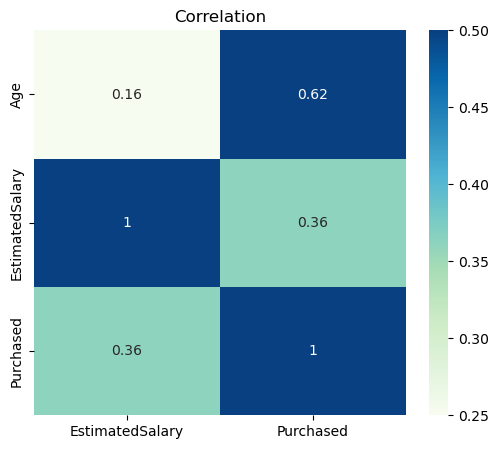

In [7]:
#Correlation between numerical features
plt.figure(figsize=(6, 5))
sns.heatmap(df.iloc[:, 1:].select_dtypes(include =np.number).corr().iloc[:, 1:], cmap='GnBu', vmin=0.25, vmax=0.5, annot = True)
plt.title("Correlation")

The correlation between features is low. However, it is around 62% and 36% between the target variable and the variable "age" and "EtimatedSalary". 

### ***Data visualization***

***Count plot***

The countplot function can be used to represent the number of observations of a categorical variable for each group with bars.

[reference](https://seaborn.pydata.org/generated/seaborn.countplot.html)

[reference](https://python-charts.com/ranking/countplot-seaborn/?utm_content=cmp-true)

***Purchased***

Text(0.5, 1.0, 'Number of observations in each category')

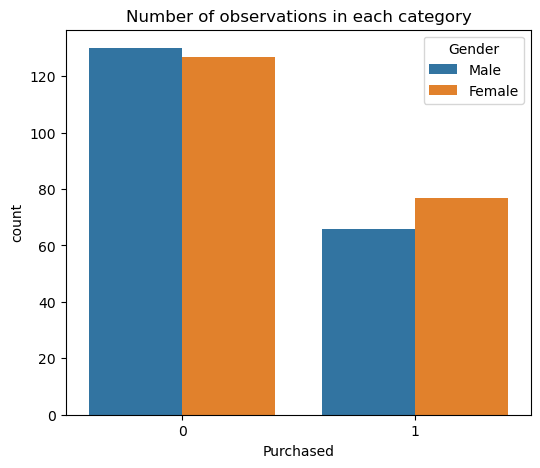

In [8]:
plt.figure(figsize=(6, 5))
sns.countplot(x="Purchased", hue='Gender', data = df)
plt.title("Number of observations in each category")

In [9]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [10]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

I see that class 0 is almost twice as big as class 1. I will try to keep my data as is, but for more details on unbalanced classes you can check this [link](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/ml2a/td2a_mlbasic_imbalanced_classification.html)


I also notice that women buy more than men. In this case, the company must continue to target more women in its advertising campaigns while keeping an eye on men.

***Gender***

Text(0.5, 1.0, 'Number of observations in each category')

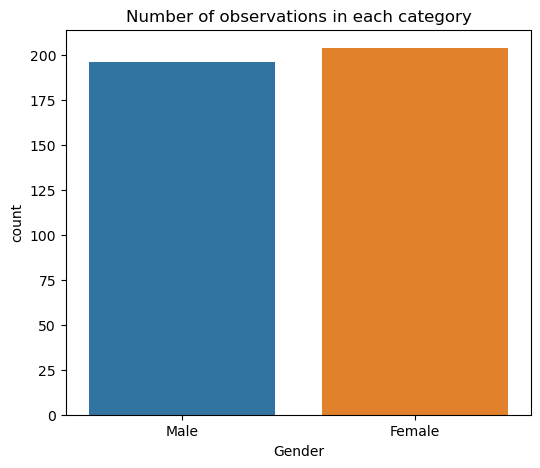

In [11]:
plt.figure(figsize=(6, 5))
sns.countplot(x="Gender", data = df)
plt.title("Number of observations in each category")

In [12]:
df["Gender"].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

We see that there are more women than men in the company's data, even if the gap is very small.

***Age***

[reference](https://seaborn.pydata.org/generated/seaborn.histplot.html)

[reference](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

<Axes: title={'center': 'Age distribution according to purchases'}, xlabel='Age', ylabel='Count'>

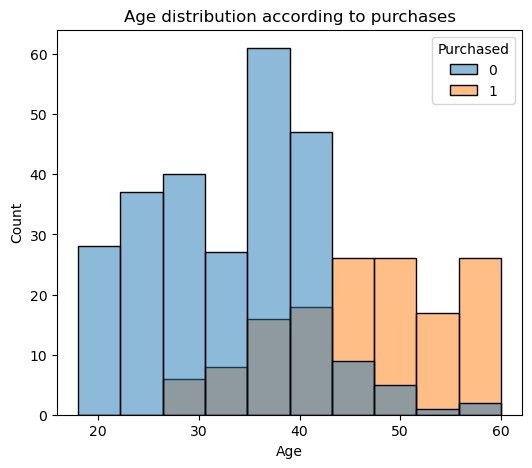

In [13]:
plt.figure(figsize=(6, 5))
plt.title("Age distribution according to purchases")
sns.histplot(x = "Age", hue = "Purchased", data = df)

I see clearly that the company focuses on people over 44 (targeting), because they are the ones who bought the product.  


<Axes: title={'center': 'Age distribution according to purchases'}, xlabel='Age'>

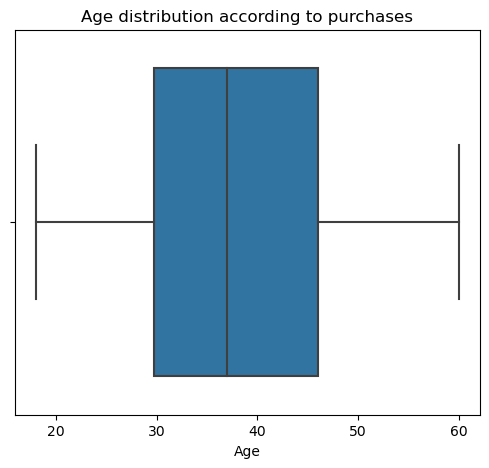

In [14]:
plt.figure(figsize=(6, 5))
plt.title("Age distribution according to purchases")
sns.boxplot(x = "Age", data = df)

There are no outliers in this feature, but the data is a little spread out, simple scaling will be enough to contain the data variability.

***EstimatedSalary***

<Axes: title={'center': 'Salary distribution according to purchases'}, xlabel='EstimatedSalary', ylabel='Count'>

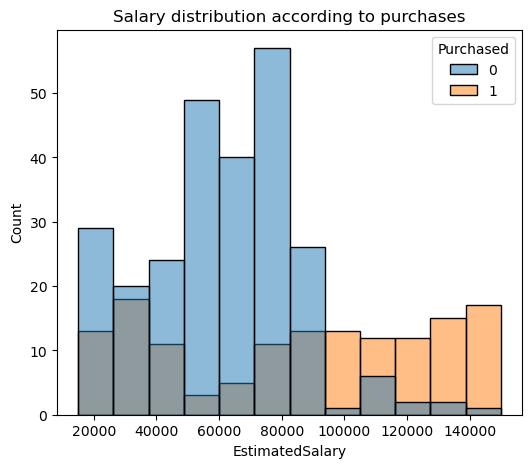

In [15]:
plt.figure(figsize=(6,5))
plt.title("Salary distribution according to purchases")
sns.histplot(x = "EstimatedSalary", hue = "Purchased", data = df)

People who have made purchases have more than 90,000 salaries per month. 

<Axes: title={'center': 'Salary distribution according to purchases'}, xlabel='EstimatedSalary'>

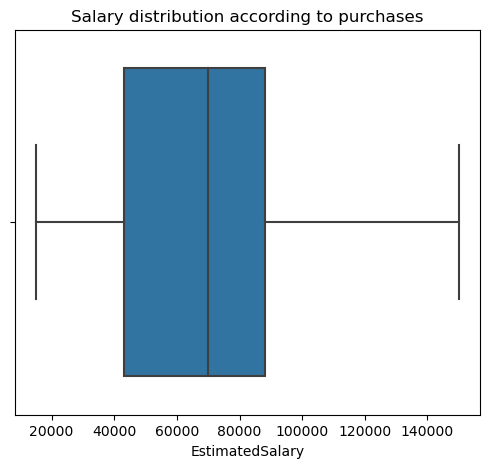

In [16]:
plt.figure(figsize=(6, 5))
plt.title("Salary distribution according to purchases")
sns.boxplot(x = "EstimatedSalary", data = df)

There are no outliers in this feature, but the data is a little spread out, simple scaling will be enough to contain the data variability.


### ***Data preprocessing***

***Delete User ID***

This feature is not important for Machine Learning models

In [17]:
data = df.drop("User ID", axis = 1)

In [18]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


***One hot encoding***


In [19]:
def func(Gender):
    if Gender == "Female":
        Gender =1
    else :
        Gender = 0
    return Gender

data["Gender"] = data["Gender"].apply(func)

In [20]:
data["Gender"].value_counts()

1    204
0    196
Name: Gender, dtype: int64

***Data set split***

[reference](https://towardsdatascience.com/splitting-a-dataset-e328dab2760a)

[reference](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [21]:
X = data.drop("Purchased", axis = 1)
y  = data["Purchased"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [24]:
X_train.shape

(280, 3)

In [25]:
X_test.shape

(120, 3)

***Data Scaling***

[reference](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

[reference](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#conda update numpy

In [30]:
import numpy as np

In [31]:
np.__version__

'1.23.2'

### ***Create Models***

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#### ***Logistic Regression***


[reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[reference](https://realpython.com/logistic-regression-python/#logistic-regression-overview)

In [33]:
# Create model
lr_model = LogisticRegression(random_state=0)

In [34]:
# Fit the model
lr_model.fit(X_train, y_train.values)

LogisticRegression(random_state=0)

In [35]:
predict_prob = lr_model.predict_log_proba(X_test)

***Evaluate model***

1. ***Prediction***

You can get the actual predictions, based on the **probability matrix**, with **.predict()**

In [36]:
lr_predictions = lr_model.predict(X_test)

2. ***Accuracy (fraction of correct predictions)***

Correct predictions / total number of data points

In [37]:
# Accuracy
round(lr_model.score(X_test, y_test), 2)

0.84

3. ***Classification report***

The classification_report() function allows to print the classification metrics of our model

[reference](https://www.statology.org/sklearn-classification-report/)

In [38]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        80
           1       0.84      0.65      0.73        40

    accuracy                           0.84       120
   macro avg       0.84      0.79      0.81       120
weighted avg       0.84      0.84      0.84       120



3. ***Confusion Matrix***

[reference](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

Text(0.5, 1.0, 'Confusion Matrix')

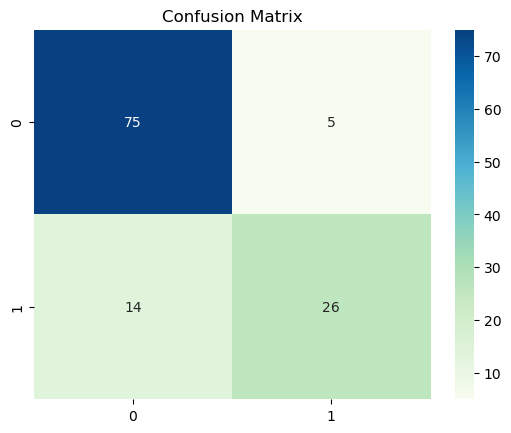

In [39]:
sns.heatmap(confusion_matrix(y_test, lr_predictions), cmap='GnBu', annot = True)
plt.title("Confusion Matrix")

### ***Support Vector Machine***

[reference](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

[reference](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

In [40]:
svm_model = SVC(random_state=0)

In [41]:
svm_model.fit(X_train, y_train.values)

SVC(random_state=0)

***Evaluate Model***

1. ***Prediction*** 

In [42]:
svm_prediction = svm_model.predict(X_test)


2. ***Classification report***

In [43]:
print(classification_report(y_test, svm_prediction))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        80
           1       0.83      0.95      0.88        40

    accuracy                           0.92       120
   macro avg       0.90      0.93      0.91       120
weighted avg       0.92      0.92      0.92       120



***3. Confusion Matrix***

Text(0.5, 1.0, 'Confusion Matrix')

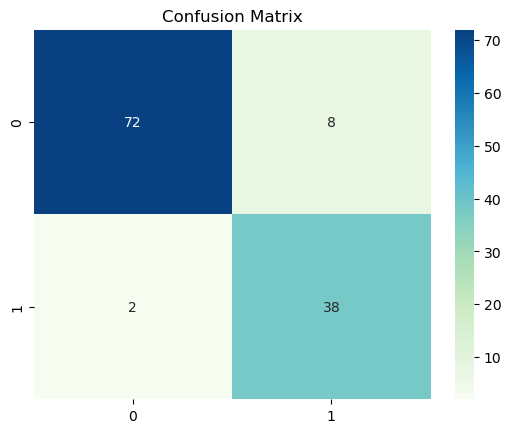

In [44]:
sns.heatmap(confusion_matrix(y_test, svm_prediction),cmap='GnBu', annot = True)
plt.title("Confusion Matrix")

### ***k-Nearest Neighbours Classifier (KNN)***

[reference](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[reference](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)

In [45]:
knn_model = KNeighborsClassifier()

In [46]:
knn_model.fit(X_train, y_train.values)

KNeighborsClassifier()

1. ***Prediction***

In [47]:
knn_predictions = knn_model.predict(X_test)

2. ***Accuracy***

In [48]:
round(knn_model.score(X_test, y_test), 2)

0.94

3. ***Classification report***

In [49]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.99      0.93      0.95        80
           1       0.87      0.97      0.92        40

    accuracy                           0.94       120
   macro avg       0.93      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120



4. ***Confusion Matrix***

Text(0.5, 1.0, 'Confusion Matrix')

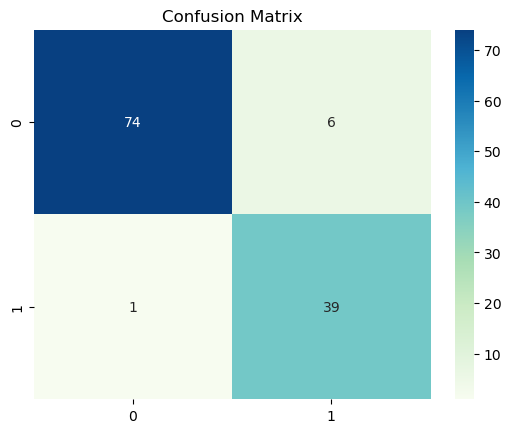

In [50]:
sns.heatmap(confusion_matrix(y_test, knn_predictions), cmap='GnBu', annot = True)
plt.title("Confusion Matrix")

### ***Random Forest Classifier***

[reference](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[reference](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)

In [51]:
rfc_model = RandomForestClassifier()

In [52]:
rfc_model.fit(X_train, y_train.values)

RandomForestClassifier()

1. ***Prediction***

In [53]:
rfc_prediction = rfc_model.predict(X_test)

2. ***Acurracy***

In [54]:
round(rfc_model.score(X_test, y_test), 2)

0.92

3. ***Classification report***

In [55]:
print(classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        80
           1       0.83      0.97      0.90        40

    accuracy                           0.93       120
   macro avg       0.91      0.94      0.92       120
weighted avg       0.93      0.93      0.93       120



4. ***Confusion Matrix***

Text(0.5, 1.0, 'Confusion Matrix')

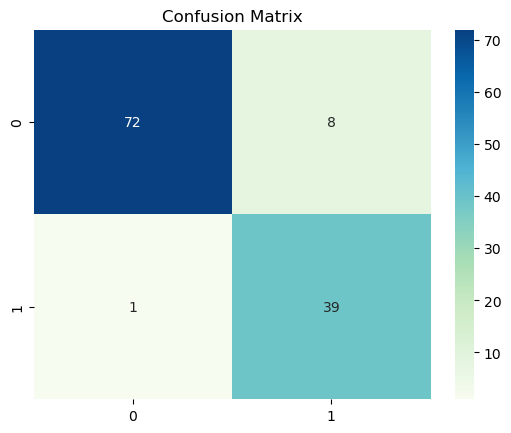

In [56]:
sns.heatmap(confusion_matrix(y_test, rfc_prediction), cmap='GnBu', annot =True)
plt.title("Confusion Matrix")

### ***AdaBoost Classifier***

[reference](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

[reference](https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/)

In [57]:
abc_model = AdaBoostClassifier()

In [58]:
abc_model.fit(X_train, y_train.values)

AdaBoostClassifier()

1. ***Prediction***

In [59]:
abc_predictions = abc_model.predict(X_test)

2. ***Accuracy***

In [60]:
abc_model.score(X_test, y_test.values)

0.925

2. ***Classification report***

In [61]:
print(classification_report(y_test, abc_predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        80
           1       0.84      0.95      0.89        40

    accuracy                           0.93       120
   macro avg       0.91      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



3. ***Confusion Matrix***

Text(0.5, 1.0, 'Confusion Matrix')

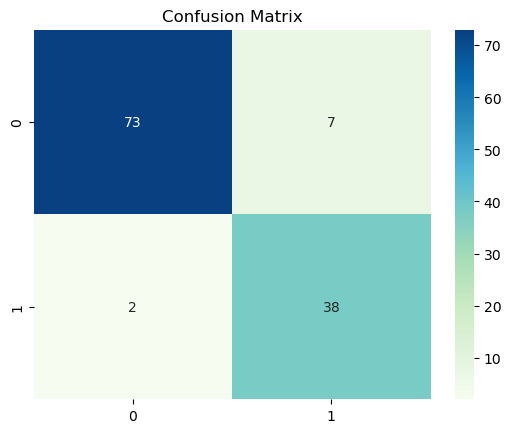

In [62]:
sns.heatmap(confusion_matrix(y_test, abc_predictions), cmap='GnBu', annot = True)
plt.title("Confusion Matrix")

### ***Neural network artificial***

[reference](https://keras.io/guides/sequential_model/)

[reference](https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/)

1. ***Create model***

[Dense layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

[Dropout Layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

In [63]:
nna_model = Sequential()

nna_model.add(Dense(units=30,activation='relu'))
nna_model.add(Dropout(0.5))

nna_model.add(Dense(units=15,activation='relu'))
nna_model.add(Dropout(0.5))

nna_model.add(Dense(units=1,activation='sigmoid'))

nna_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

[losses](https://keras.io/api/losses/)

[adam](https://keras.io/api/optimizers/adam/)

[optimizer](https://keras.io/api/optimizers/)

2. ***Early Stoping***

[reference](https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/)

In [64]:
early_stop = EarlyStopping(monitor='val_loss', patience = 2)

3. ***Fit Model***

In [65]:
nna_model.fit(X_train, 
          y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
      )

Epoch 1/200
9/9 [==============================] - 0s 22ms/step - loss: 0.7131 - accuracy: 0.5607 - val_loss: 0.6877 - val_accuracy: 0.5750
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 0.7012 - accuracy: 0.5321 - val_loss: 0.6775 - val_accuracy: 0.7000
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.5464 - val_loss: 0.6698 - val_accuracy: 0.7083
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.6000 - val_loss: 0.6632 - val_accuracy: 0.7167
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.6321 - val_loss: 0.6565 - val_accuracy: 0.7083
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.6214 - val_loss: 0.6513 - val_accuracy: 0.7083
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.6784 - accuracy: 0.6214 - val_loss: 0.6463 - val_accuracy: 0.7083
Epoch 8/200
9/9 [=========

9/9 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.7679 - val_loss: 0.3707 - val_accuracy: 0.9250
Epoch 60/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.7679 - val_loss: 0.3663 - val_accuracy: 0.9333
Epoch 61/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.7857 - val_loss: 0.3604 - val_accuracy: 0.9333
Epoch 62/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4453 - accuracy: 0.8179 - val_loss: 0.3551 - val_accuracy: 0.9333
Epoch 63/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4554 - accuracy: 0.8250 - val_loss: 0.3539 - val_accuracy: 0.9250
Epoch 64/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4812 - accuracy: 0.7821 - val_loss: 0.3494 - val_accuracy: 0.9250
Epoch 65/200
9/9 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.8321 - val_loss: 0.3436 - val_accuracy: 0.9250
Epoch 66/200
9/9 [===============

In [66]:
# resumé du model
nna_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                120       
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


4. ***Loss and validation functions***

In [67]:
model_loss = pd.DataFrame(nna_model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.713079,0.560714,0.687746,0.575000
1,0.701183,0.532143,0.677487,0.700000
2,0.697553,0.546429,0.669788,0.708333
3,0.673329,0.600000,0.663231,0.716667
4,0.670578,0.632143,0.656512,0.708333


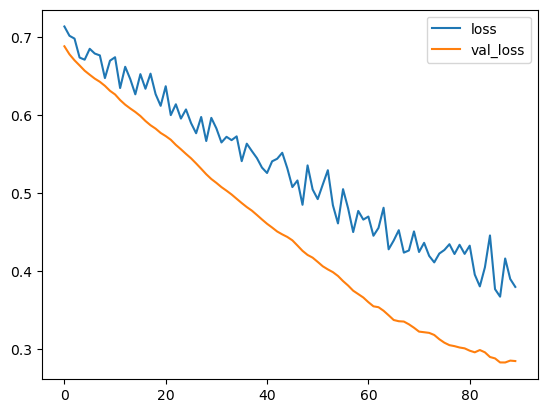

In [68]:
model_loss[["loss", "val_loss"]].plot();

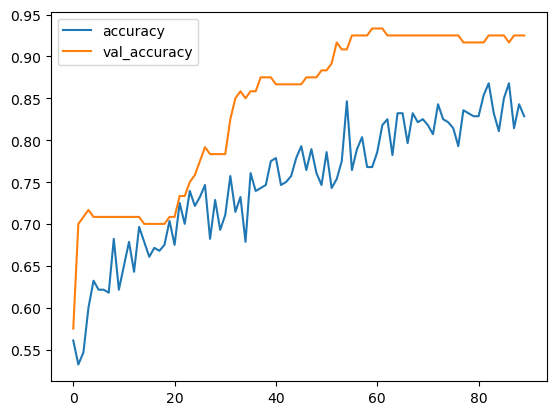

In [69]:
model_loss[["accuracy", "val_accuracy"]].plot();

***Evaluate model***

In [70]:
nna_predictions = (nna_model.predict(X_test) > 0.5).astype("int32")

In [71]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,nna_predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        80
           1       0.86      0.93      0.89        40

    accuracy                           0.93       120
   macro avg       0.91      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



Text(0.5, 1.0, 'Confusion Matrix')

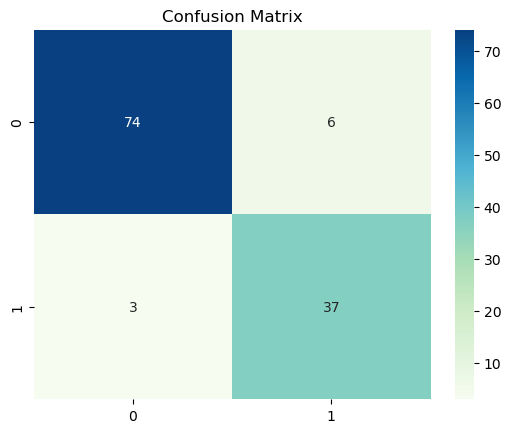

In [72]:
sns.heatmap(confusion_matrix(y_test, nna_predictions), cmap='GnBu', annot = True)
plt.title("Confusion Matrix")

### ***Model performance comparison***

In [73]:
dict = {"Logistic Regression" : [0.84, 0.65, 0.73, 0.84], "Support Vector Machines" : [0.83, 0.95, 0.88, 0.92], "K Neighbors Classifier" : [0.87, 0.97, 0.92, 0.94 ], "Random Forest Classifier" : [0.81, 0.97, 0.89, 0.92], "AdaBoost Classifier": [0.84, 0.95, 0.89, 0.93], "Neural network artificial" : [0.82, 0.93, 0.87, 0.91]}

In [74]:
pd.DataFrame(dict, index = ["precision", "recall", "f1-score", "accuracy"])

,Logistic Regression,Support Vector Machines,K Neighbors Classifier,Random Forest Classifier,AdaBoost Classifier,Neural network artificial
precision,0.84,0.83,0.87,0.81,0.84,0.82
recall,0.65,0.95,0.97,0.97,0.95,0.93
f1-score,0.73,0.88,0.92,0.89,0.89,0.87
accuracy,0.84,0.92,0.94,0.92,0.93,0.91


We note that the knn model is the most efficient model. We will therefore save this model for future predictions on new data. 

In the meantime, we will retrieve a random client from our data to test the prediction of the chosen model.

### ***Predict whether a randomly selected person in the dataset buys the product or not***

We use the model that has the best performance to make this prediction (knn_model)

***Looking for a customer in the dataset***

In [75]:
import random
random.seed(101)
random_ind = random.randint(0,len(data))

single_customer = data.drop('Purchased',axis=1).iloc[random_ind]
single_customer

Gender                  1
Age                    43
EstimatedSalary    112000
Name: 297, dtype: int64

***Scaling row***

In [76]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 3))

C:\Users\HP\anaconda3\envs\Data_Science_Projects\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


***Predict which customer it is***

In [77]:
knn_model.predict(single_customer)

array([1], dtype=int64)

This is a customer who purchased the product

***Check prediction***

In [78]:
data.iloc[random_ind]['Purchased']

1

Our model indeed predicts that this chosen person buys the product, which also corresponds to reality.

We found the most efficient model (KNN) that will allow us to make future predictions on new data that our model did not know. The above prediction on a sample of customers gave conclusive results. This KNN model is ready for deployment. It was saved, it was enough to download it to make new predictions. 

## ------------------------------------------------------------------------------------------------------------------------------

# Dployument in production

### **Train the model on all data (X)**

In [79]:
X_scaled = scaler.fit_transform(X)

In [80]:
knn_model = KNeighborsClassifier()

In [81]:
knn_model.fit(X_scaled, y.values)

KNeighborsClassifier()

In [83]:
knn_model.score(X_scaled, y.values)

0.915

## Serialization

**[reference](https://flynn.gg/blog/machine-learning-model-serialization/)**

### **Save the model and scaler object**

In [84]:
import joblib

joblib.dump(knn_model, 'knn_model.pkl')
joblib.dump(scaler, "scaler_customer.pkl")

['scaler_customer.pkl']

### **Load the model and scaler object (deserialize)**

In [85]:
model  = joblib.load('knn_model.pkl')

scaler = joblib.load("scaler_customer.pkl")

## Test a prediction

In [86]:
import random
random.seed(101)
random_ind = random.randint(0,len(data))

single_customer = data.drop('Purchased',axis=1).iloc[random_ind]
single_customer

Gender                  1
Age                    43
EstimatedSalary    112000
Name: 297, dtype: int64

In [87]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 3))

C:\Users\HP\anaconda3\envs\Data_Science_Projects\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [88]:
knn_model.predict(single_customer)

array([1], dtype=int64)